In [1]:
#include <iostream>
#include <string>
#include <stdio.h>
#include <cmath>

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root"); 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

Event wieght is activated Why?, Also the variables of the jets: Reco, that goes for "reconstruction from the calorimeter", and Truth, that corresponds to jets formed by truth particles except of neutrinos, muons and non interacting particles.

In [4]:
float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;

tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

In [6]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt = new TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200);

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw); // we construct the lead reco from the high energy pt 
    for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt->Fill(reco_R4_pt->at(j)/1000.,evtw);     
    }
    }
}

std::cout << "Done!" << std::endl;

Done!


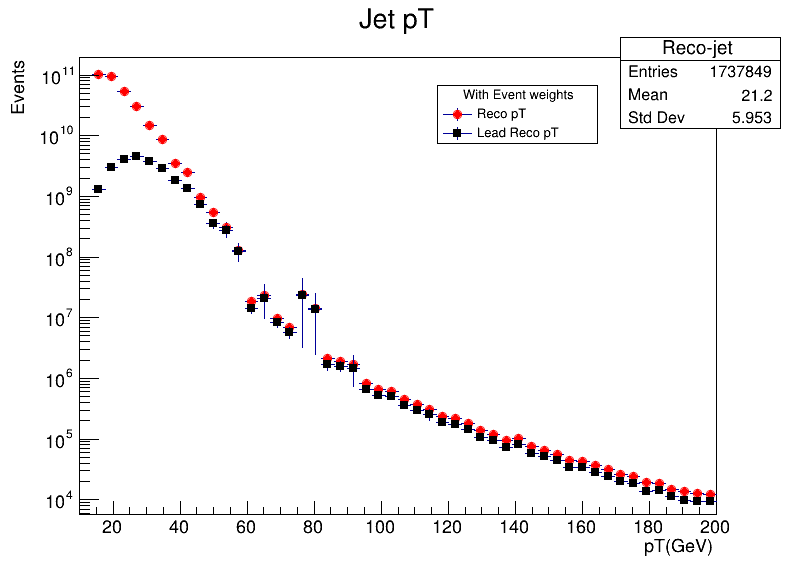

In [8]:
hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("With Event weights","C");
   legend->AddEntry(hist_reco_pt,"Reco pT","lep");
   legend->AddEntry(hist_leadreco_pt,"Lead Reco pT","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

Now we need to compare the leading truth jet pt with the leading reco jet pt with and without event weights.

First, the lead reco and lead truth with weight

In [9]:
TH1F *hist_leadtruth_pt = new TH1F("Lead Truth-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt = new TH1F("Truth-jet","Jet pT; pT(GeV);Events",50,10,200);

In [10]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truth_pt->Fill(truth_R4_pt->at(j)/1000.,evtw);     
    }
    }
}

std::cout << "Done!" << std::endl;

Done!


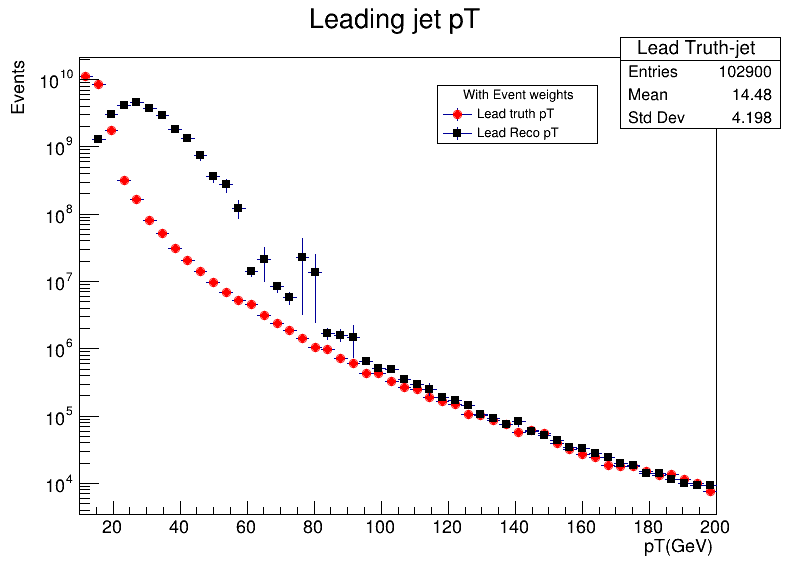

In [11]:
hist_leadtruth_pt->SetMarkerStyle(20);
hist_leadtruth_pt->SetMarkerColor(kRed);
hist_leadtruth_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("With Event weights","C");
   legend->AddEntry(hist_leadtruth_pt,"Lead truth pT","lep");
   legend->AddEntry(hist_leadreco_pt,"Lead Reco pT","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

Now lead truth vs lead reco without event weight

In [12]:
TH1F *hist_leadtruth_pt_nowe = new TH1F("Lead Truth-jet no weight","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadreco_pt_nowe = new TH1F("Lead Reco-jet no weight","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt_nowe = new TH1F("Truth-jet no weight"," jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt_nowe = new TH1F("Reco-jet no weight"," jet pT; pT(GeV);Events",50,10,200);

In [13]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt_nowe->Fill(truth_R4_pt->at(0)/1000.); 
    for(int j=0; j<truth_R4_pt->size(); j++){
    hist_truth_pt_nowe->Fill(truth_R4_pt->at(j)/1000.);     
    }
    }
}

std::cout << "Done!" << std::endl;

Done!


In [14]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt_nowe->Fill(reco_R4_pt->at(0)/1000.);
    for(int j=0; j<reco_R4_pt->size(); j++){
    hist_reco_pt_nowe->Fill(reco_R4_pt->at(j)/1000.);     
    }
    }
}
std::cout << "Done!" << std::endl;

Done!


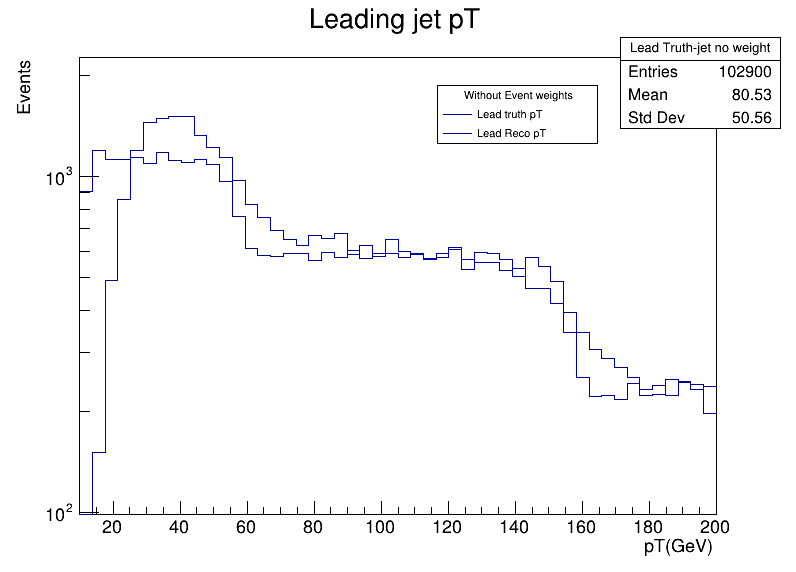

In [15]:
hist_leadtruth_pt_nowe->SetMarkerStyle(20);
hist_leadtruth_pt_nowe->SetMarkerColor(kRed);
hist_leadtruth_pt_nowe->Draw("");
hist_leadreco_pt_nowe->SetMarkerStyle(21);
hist_leadreco_pt->SetMarkerColor(kBlue);
hist_leadreco_pt_nowe->Draw("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("Without Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_leadtruth_pt_nowe,"Lead truth pT","l");
   legend->AddEntry(hist_leadreco_pt_nowe,"Lead Reco pT","l");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

Now we'll compare for all the jets pT

First reco and truth with weight

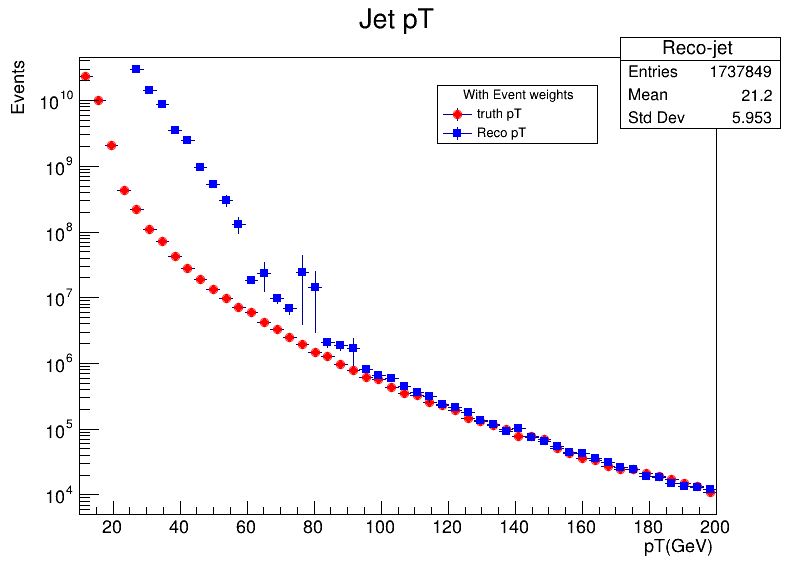

In [16]:
hist_truth_pt->SetMarkerStyle(20);
hist_truth_pt->SetMarkerColor(kRed);
hist_truth_pt->Draw("");
hist_reco_pt->SetMarkerStyle(21);
hist_reco_pt->SetMarkerColor(kBlue);
hist_reco_pt->Draw("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("With Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_truth_pt,"truth pT","lep");
   legend->AddEntry(hist_reco_pt,"Reco pT","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

Then, reco and truth without weight

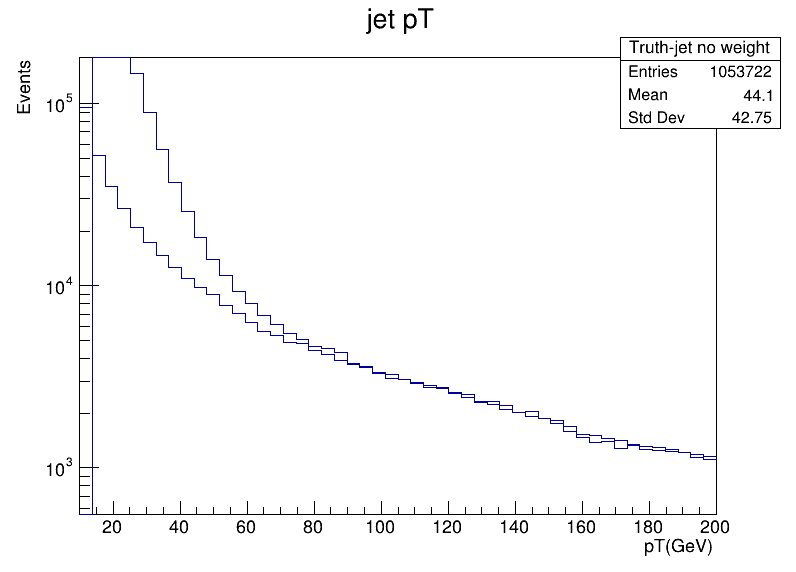

In [17]:
hist_truth_pt_nowe->SetMarkerStyle(20);
hist_truth_pt_nowe->SetMarkerColor(kRed);
hist_truth_pt_nowe->Draw("");
hist_reco_pt_nowe->SetMarkerStyle(21);
hist_reco_pt_nowe->Draw("same");
canvas->SetLogy();
canvas->Draw();

Now we will study the jets pileup dependence. Pileup is defined as the average number of particle interactions per bunch-crossing 

In [18]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

float mu = -1;
tree->SetBranchAddress("mu_average", &mu);

Plot jet vs plot pileup

In [19]:
TH2F *hist_jetpt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_jetpt_npv = new TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200);

Fill the histograms with a cut to accept events with at least one jet and require the leading jet to have pT above 20 GeV

In [20]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
        hist_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        prof_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


In [21]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

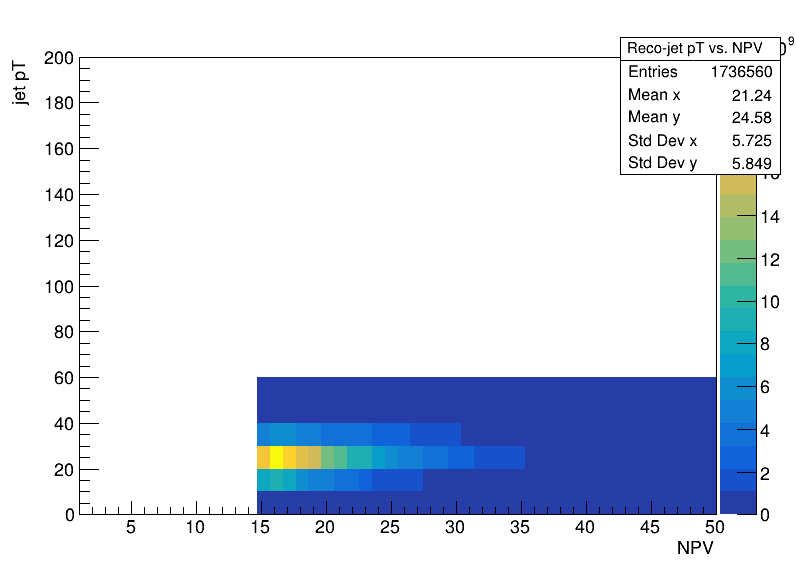

In [22]:
hist_jetpt_npv->Draw("colz");
canvas2->Draw();

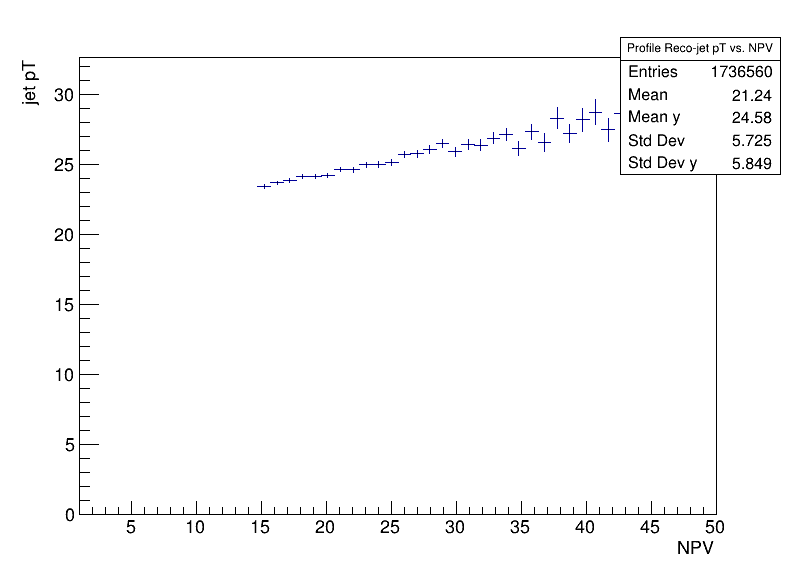

In [23]:
prof_jetpt_npv->Draw("");
canvas2->Draw();

In excercise 3 we Make the plot of truth jet pT vs. pileup.  

In [24]:
TH2F *hist_truthjetpt_npv = new TH2F("Truth-jet pT vs. mu average",";mu average; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_truthjetpt_npv = new TProfile("Profile Truth-jet pT vs. mu average",";mu average; jet pT",50,1,50, 0, 200);

In [25]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truthjetpt_npv->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        prof_truthjetpt_npv->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


In [26]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas2


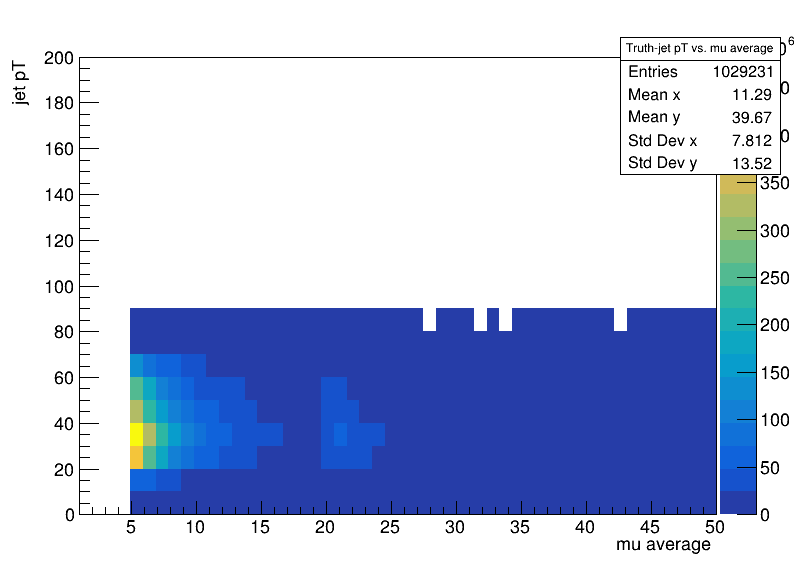

In [27]:
hist_truthjetpt_npv->Draw("colz");
canvas2->Draw();

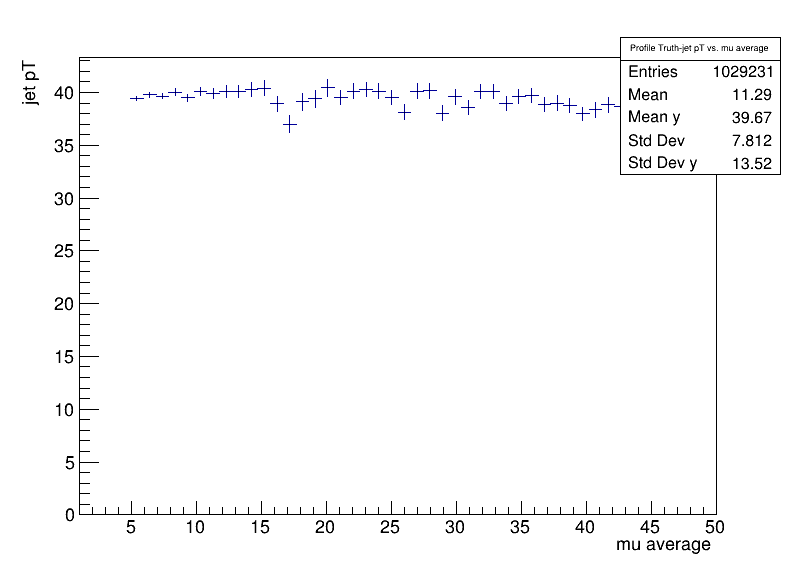

In [28]:
prof_truthjetpt_npv->Draw("");
canvas2->Draw();

Now we plot the jvf variable (Jet vertex fraction)

In [5]:
vector<float> *reco_R4_jvf;

tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);

In [30]:
TH1F *hist_leadreco_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);
TH1F *hist_leadreco100_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet JVF (Potential memory leak).


In [31]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        hist_leadreco_jvf->Fill(reco_R4_jvf->at(0), evtw);
        if(reco_R4_pt->at(0)>100000.){hist_leadreco100_jvf->Fill(reco_R4_jvf->at(0), evtw);}
        
    }
}

std::cout << "Done!" << std::endl;

Done!


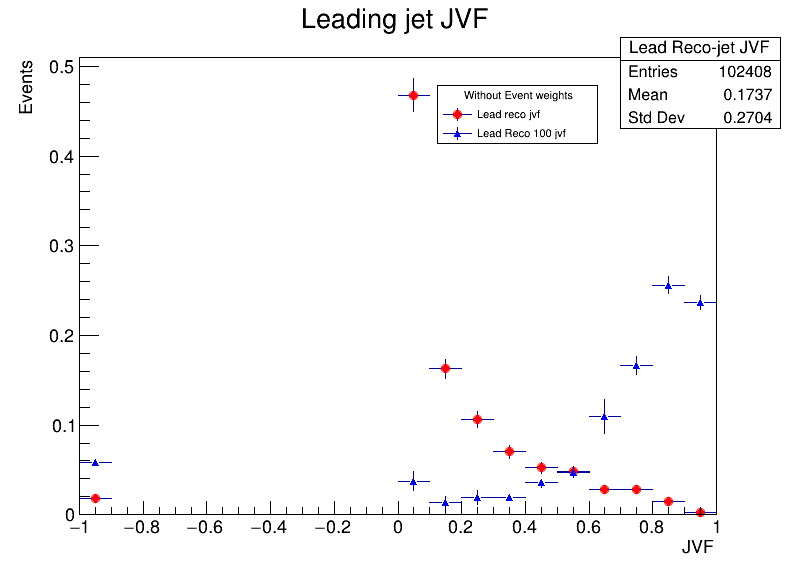

In [32]:
hist_leadreco_jvf->SetMarkerStyle(20);
hist_leadreco_jvf->SetMarkerColor(kRed);
hist_leadreco_jvf->DrawNormalized("");
hist_leadreco100_jvf->SetMarkerStyle(22);
hist_leadreco100_jvf->SetMarkerColor(kBlue);
hist_leadreco100_jvf->DrawNormalized("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("Without Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_leadreco_jvf,"Lead reco jvf","lep");
   legend->AddEntry(hist_leadreco100_jvf,"Lead Reco 100 jvf","lep");
   legend->Draw();
canvas2->Draw();

Excercise 4-5: Now we use a |JVF|>0.5 cut in the lead reco jets to compare with the leading reco jet pT (without cut), the leading truth jets (without cut) and the leading tracks jets (without cut).
   

In [6]:
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;
vector<float> *track_R4_pt;
tree->SetBranchAddress("TrackJets_R4_pt", &track_R4_pt);
tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);

In [7]:
TCanvas *canvas3 = new TCanvas("Canvas3","",800,600);

In [20]:
TH1F *hist_leadreco_pt_cut = new TH1F("Lead Reco jet with jvf>0.5","Leading reco jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadreco_pt_nocut = new TH1F("Lead reco-jet","Leading reco jet pT cut; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt_nocut = new TH1F("Lead Truth-jet","Leading truth jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtracks_pt_nocut = new TH1F("Lead Tracks-jet","Leading tracks jet pT; pT(GeV);Events",50,10,200);

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco jet with jvf>0.5 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead reco-jet (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead Truth-jet (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead Tracks-jet (Potential memory leak).


In [21]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);  

    if(reco_R4_pt->size()>0){
    hist_leadreco_pt_nocut->Fill(reco_R4_pt->at(0)/1000.,evtw);}
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt_nocut->Fill(truth_R4_pt->at(0)/1000.,evtw);}
    if(track_R4_pt->size()>0){
    hist_leadtracks_pt_nocut->Fill(track_R4_pt->at(0)/1000.,evtw);}
    if(fabs(reco_R4_jvf->at(0))>0.5){
    hist_leadreco_pt_cut->Fill(reco_R4_pt->at(0)/1000.,evtw);}
}

std::cout << "Done!" << std::endl;

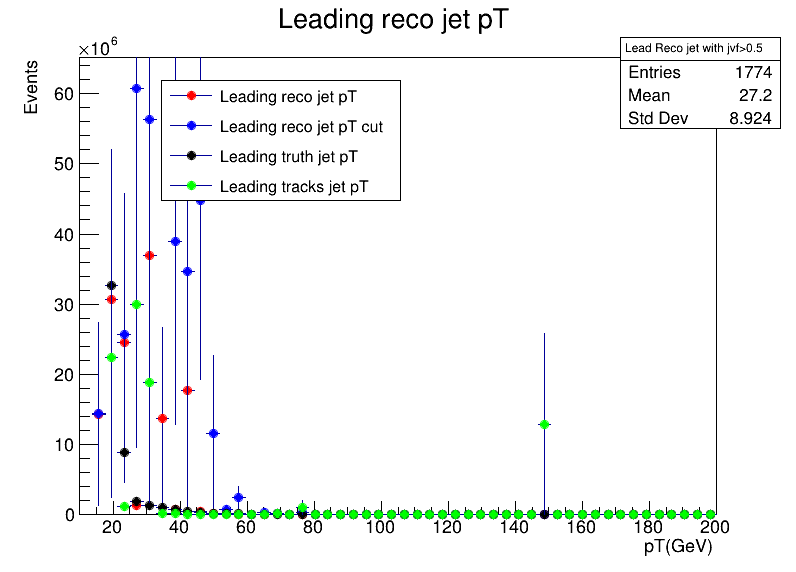

In [22]:
hist_leadreco_pt_cut->SetMarkerStyle(20);
hist_leadreco_pt_cut->SetMarkerColor(kRed);
hist_leadreco_pt_cut->Draw("");
hist_leadreco_pt_nocut->SetMarkerStyle(20);
hist_leadreco_pt_nocut->SetMarkerColor(kBlue);
hist_leadreco_pt_nocut->Draw("SAME");
hist_leadtruth_pt_nocut->SetMarkerStyle(20);
hist_leadtruth_pt_nocut->SetMarkerColor(kBlack);
hist_leadtruth_pt_nocut->Draw("SAME");
hist_leadtracks_pt_nocut->SetMarkerStyle(20);
hist_leadtracks_pt_nocut->SetMarkerColor(kGreen);
hist_leadtracks_pt_nocut->Draw("SAME");
canvas3->BuildLegend();
canvas3->Draw();

In [21]:
reco_R4_pt->size()

(unsigned long) 0


In [18]:
a

(float) 0.00000f
